# Sales Analysis

### Imports and load/concatenate dataset

In [110]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [111]:
files = [file for file in os.listdir('./Sales_Data')]

df = pd.DataFrame()

for file in files:
    month = pd.read_csv("./Sales_Data/"+file)
    df = pd.concat([df, month])

## Clean up the data

In [112]:
# remove rows of NaN
df = df.dropna(how='all')

# remove rows with header entries
df = df[~((df['Price Each'] == 'Price Each'))]

# change type of columns
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

### Q1: What was the best month for sales?

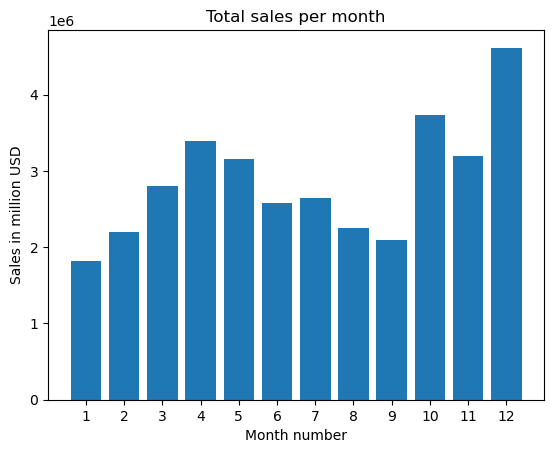

In [113]:
# Add month column
df['Month'] = df['Order Date'].str[0:2]
df['Month'] = df['Month'].astype('int32')

# Add a total sales column
df['Total Value'] = df['Price Each'] * df['Quantity Ordered']

# Answer the question
results = df.groupby('Month').sum(numeric_only=True)
months = range(1,13)

plt.bar(months, results['Total Value'])
plt.xticks(months)
plt.ylabel('Sales in million USD')
plt.xlabel('Month number')
plt.title('Total sales per month')
plt.show()
# From graph: December best month

### Q2: What city had the highest number of sales?

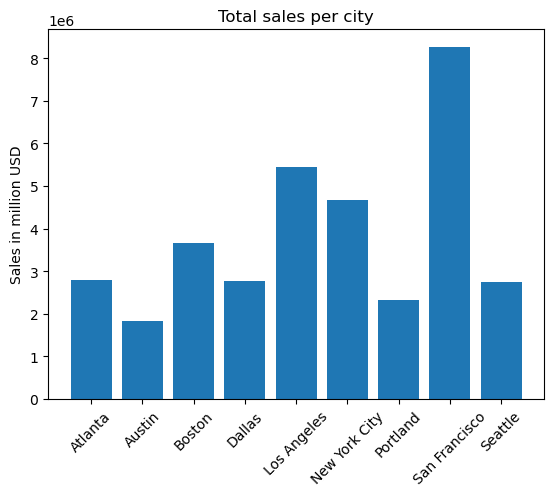

In [114]:
# create new city column
df['City'] = df['Purchase Address'].str.split(',').str[1].str.strip()

# answer the question 
city_results = df.groupby('City').sum(numeric_only=True).reset_index()
plt.bar(city_results['City'], city_results['Total Value'])
plt.ylabel('Sales in million USD')
plt.title('Total sales per city')
plt.xticks(rotation=45)
plt.show()

# From graph: San Francisco city with most sales

### Q3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [115]:
# use datetime library for easier time handling date data
df['Order Date'] = pd.to_datetime(df['Order Date'])

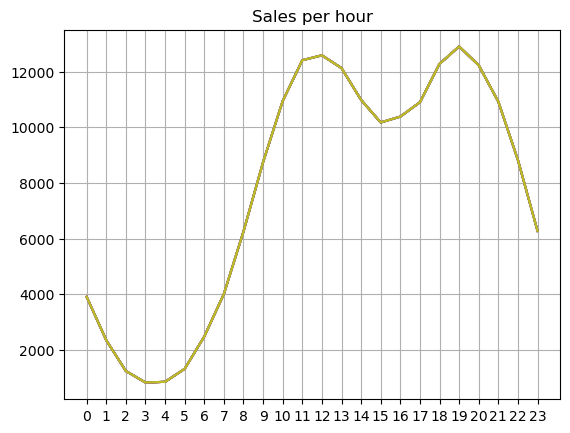

In [116]:
# create hour column
df['Hour'] = df['Order Date'].dt.hour

# answer the question
plt.plot(range(0,24), df.groupby('Hour').count())
plt.xticks(range(0,24))
plt.grid()
plt.title('Sales per hour')
plt.show()

# From graph: Recommendation would be around either of the peaks, 11-13 and 18-20

### Q4: What products are most often sold together?

In [117]:
# find and keep duplicate rows, exclude others 
df_dup = df[df['Order ID'].duplicated(keep=False)]

In [118]:
# using itertools and collections to solve this problem
from itertools import combinations 
from collections import Counter

order_groups = df.groupby('Order ID')['Product'].apply(list)

pair_counter = Counter()
for products in order_groups:
    pairs = combinations(products, 2)
    pair_counter.update(pairs)
    
pair_counter.most_common(5)
# Top 5 (can show as many as needed) pair of products

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361)]

### Q5: What product sold the most? Why do you think it sold the most?

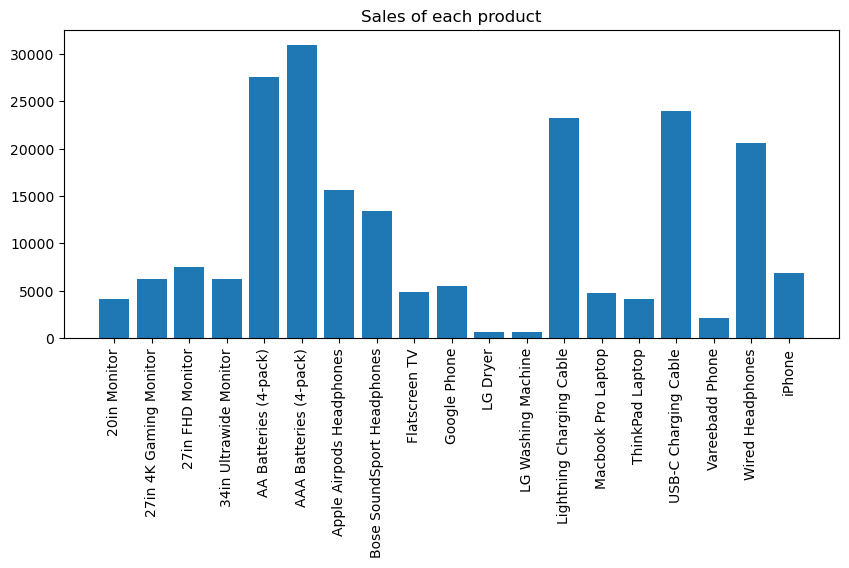

In [119]:
# group by products and sum then use quantity ordered
products_sales = df.groupby('Product').sum(numeric_only=True).reset_index()

# answer the question
plt.figure(figsize=(10,4))
plt.bar(products_sales['Product'], products_sales['Quantity Ordered'])
plt.title('Sales of each product')
plt.xticks(rotation='vertical')
plt.show()

# From graph: AAA Batteries (4-pack) has sold the most. Maybe because its cheap

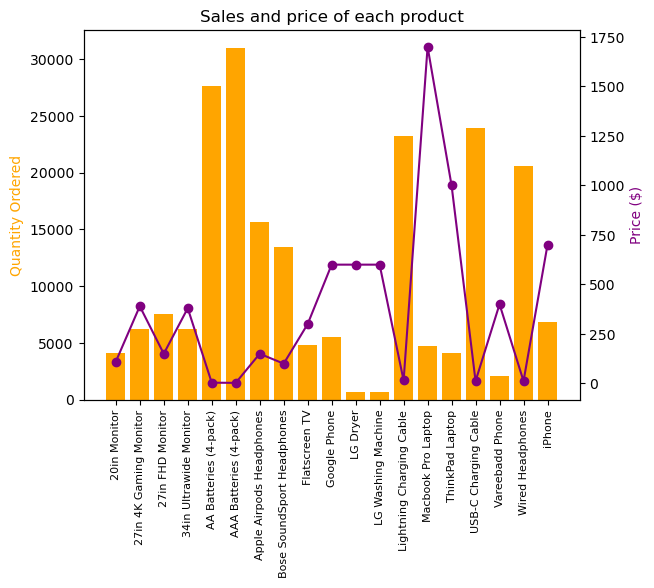

In [120]:
# Test the price hypothesis
prices = df.groupby('Product').mean(numeric_only=True)['Price Each']

products = products_sales['Product']
quantity = products_sales['Quantity Ordered']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity, color='orange')
ax2.plot(products, prices, color='purple', marker='o')

ax1.set_ylabel('Quantity Ordered', color='orange')
ax2.set_ylabel('Price ($)', color='purple')
ax1.set_xticks(range(len(products)))
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.title('Sales and price of each product')
plt.show()

# This graph strongly suggest there is a correlation between quantity ordered and the price of the product.
# There are some outliers where the price of Macbook Pro is significantly higher than LG Dryer, yet it sold more.
# That could be explained by the fact that the demand is just higher for that product. 